In [1]:
import nltk
from nltk.stem.porter import PorterStemmer
import string
import re
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
num_regex = re.compile('^[+-]?[0-9]+\.?[0-9]*$')
from sklearn.cross_validation import train_test_split

/home/saddam/ML/venv3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
stemmer = LancasterStemmer()
def stem_tokens(tokens,stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

################### Stop Word Remove ##################

stop_words = set(stopwords.words('english'))

#punctuation list
s = list(string.punctuation)

def tokenize(string):
    tokens = nltk.word_tokenize(string)
    for index, token in enumerate(tokens):
        if token == '@' and (index+1) < len(tokens):
            tokens[index+1] = '@' + re.sub('[0-9]+.*', '', tokens[index+1])
            tokens.pop(index)
    #remove english stop word from tokens
    filtered_sentence = [w for w in tokens if not w in stop_words]
    
    #remove punctuation 
    tt = [i for i in filtered_sentence if not i in s]
    
    #Apply stemming 
    stems_word = stem_tokens(tt,stemmer)
    
    return stems_word

In [3]:
data = pd.read_excel('training_set_rel3.xls')
data.head()
df = data[data['essay_set']==2]
x = df['essay']
Y = df['domain1_score']

In [4]:
k = x.tolist()

In [5]:
sd=k[0]

In [6]:
nltk.word_tokenize(sd)

['Certain',
 'materials',
 'being',
 'removed',
 'from',
 'libraries',
 'such',
 'as',
 'books',
 ',',
 'music',
 'and',
 'magazines',
 ',',
 'should',
 "n't",
 'be',
 'removed',
 'from',
 'the',
 'libraries',
 '.',
 'It',
 'gives',
 'people',
 'a',
 'chance',
 'to',
 'understand',
 'how',
 'the',
 'real',
 'world',
 '@',
 'CAPS2',
 '.',
 'Having',
 'certain',
 'materials',
 'such',
 'as',
 'books',
 'and',
 'music',
 'definitly',
 'should',
 'not',
 'be',
 'removed',
 ',',
 'because',
 'most',
 'books',
 'and',
 'music',
 'can',
 'show',
 'most',
 'people',
 'how',
 'bad',
 'the',
 'statement',
 'in',
 'the',
 'book',
 '@',
 'CAPS2',
 'or',
 'how',
 'bad',
 'the',
 'lyrics',
 'are',
 'in',
 'a',
 'song',
 ',',
 'and',
 'help',
 'that',
 'person',
 'to',
 'avoid',
 'that',
 'type',
 'of',
 'thing',
 'that',
 'the',
 'book',
 'or',
 'song',
 '@',
 'CAPS2',
 'saying',
 'to',
 'the',
 'reader',
 'or',
 'listener',
 '.',
 'People',
 'should',
 'give',
 'every',
 'type',
 'of',
 'music',
 '

In [7]:
tfidf = TfidfVectorizer(tokenizer=tokenize,min_df=1,max_features=1000).fit(x)
X = tfidf.transform(x)

In [8]:
sing = X.toarray()
sing.shape

(1800, 1000)

In [9]:
U, s, V = np.linalg.svd(sing, full_matrices=False)
m = 0
for i in range(1000):
    j = float(s[i])
    if j >= 1.3:
          m =m+1
print(m)

238


In [10]:
reduce = len(s)-m
#print reduce
ua = U.shape[1]-reduce
u = U[:,:ua]
#print(u.shape)
v = V.shape[0]-reduce
v = V[:v]
####################################################
from numpy import diag
S= diag(s[:m])
S.shape

(238, 238)

In [11]:
u = np.matrix(u)
s = np.matrix(S)
v = np.matrix(v)

In [12]:
svd_matrix = u*s*v

In [13]:
svd_matrix.shape

(1800, 1000)

In [14]:
from scipy import sparse
full_svd = sparse.csc_matrix(svd_matrix)

In [15]:
train_x,test_x,train_y,test_y= train_test_split(full_svd,Y,random_state=0,test_size=0.1)

In [16]:
#SVM

In [17]:
from sklearn import svm
model = svm.SVC(C=0.7,gamma=1)
model.fit(train_x,train_y)
model.score(test_x,test_y)

0.65555555555555556

In [18]:
from sklearn.linear_model import SGDRegressor
sgmodel = SGDRegressor(alpha=0.0001,max_iter=1000)
sgmodel.fit(train_x,train_y)
sgmodel.score(test_x,test_y)

0.47655908957766757

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,mean_squared_error,median_absolute_error,r2_score,explained_variance_score


In [120]:
print('SGDregressor mean_squared_log_error :%f' % mean_squared_log_error(test_y,sgmodel.predict(test_x)))
print( 'SGDregressor mean_absolute_error :%f'%mean_absolute_error(test_y,sgmodel.predict(test_x)))
print( 'SGDregressor median_absolute_error :%f' % median_absolute_error(test_y,sgmodel.predict(test_x)))
print('SGDregressor mean_squared_error :%f' % mean_squared_error(test_y,sgmodel.predict(test_x)))
print( 'SGDregressor r2_score :%f' % r2_score(test_y,sgmodel.predict(test_x)))
print( 'SGDregressor variance :%f' % explained_variance_score(test_y,sgmodel.predict(test_x)))
print('SGDregressor min_max accuracy :%f' % min_max(actual_ac,sgmodel.predict(test_x)))

SGDregressor mean_squared_log_error :0.022993
SGDregressor mean_absolute_error :0.438048
SGDregressor median_absolute_error :0.364473
SGDregressor mean_squared_error :0.325697
SGDregressor r2_score :0.476559
SGDregressor variance :0.479515
SGDregressor min_max accuracy :0.874392


In [21]:
#pd.DataFrame({'Actual':test_y.tolist(),'SVM':model.predict(test_x).tolist(),'SGRegra':sgmodel.predict(test_x).tolist()})

,Actual,SGRegra,SVM
0,3.0,3.938046,3.0
1,5.0,4.583007,4.0
2,3.0,3.467885,3.0
3,4.0,3.603541,4.0
4,4.0,4.549480,4.0
5,4.0,3.793792,4.0
6,4.0,2.998733,3.0
7,3.0,3.720218,4.0
8,4.0,3.378475,4.0
9,3.0,3.494527,4.0


In [22]:
svm_model = model.predict(test_x).tolist()
sgd_model = sgmodel.predict(test_x).tolist()

In [84]:
final_ac = []
for i in range(180):
    s_samble = float((float(svm_model[i]*3.0)+float(sgd_model[i]*8.0))/11.0)
    final_ac.append(s_samble)


In [85]:
#pd.DataFrame({'Actual':test_y.tolist(),'B_samble':final_ac,'SVM':model.predict(test_x).tolist(),'SGRegra':sgmodel.predict(test_x).tolist()})

In [103]:
actual_ac=test_y.tolist()
kk=0.0000
def min_max(actual,predict):
    actual_ac = actual
    final_ac = predict
    kk=0.000
    for jj in range(180):
        kk = kk + float(float(min(actual_ac[jj],final_ac[jj]))/float(max(actual_ac[jj],final_ac[jj])))
    kk = float(kk/180.0)
    return kk


In [104]:
print('SGDregressor mean_squared_log_error :%f' % mean_squared_log_error(test_y,final_ac))
print( 'SGDregressor mean_absolute_error :%f'%mean_absolute_error(test_y,final_ac))
print( 'SGDregressor median_absolute_error :%f' % median_absolute_error(test_y,final_ac))
print('SGDregressor mean_squared_error :%f' % mean_squared_error(test_y,final_ac))
print( 'SGDregressor r2_score :%f' % r2_score(test_y,final_ac))
print('SGDregressor variance_score :%f' % explained_variance_score(test_y.tolist(),final_ac))
print('SGDregressor min_max accuracy :%f' % min_max(actual_ac,final_ac))

SGDregressor mean_squared_log_error :0.023256
SGDregressor mean_absolute_error :0.415814
SGDregressor median_absolute_error :0.309332
SGDregressor mean_squared_error :0.317865
SGDregressor r2_score :0.489145
SGDregressor variance_score :0.495836
SGDregressor min_max accuracy :0.880750


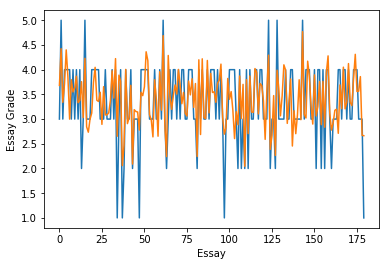

In [111]:
import matplotlib.pyplot as plt

plt.plot(actual_ac)
plt.plot(final_ac)
plt.ylabel('Essay Grade')
plt.xlabel('Essay')
plt.show()

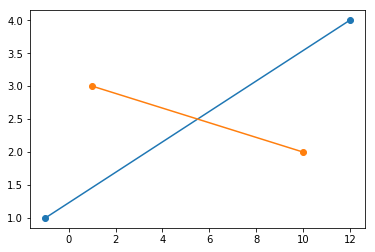

In [117]:
import matplotlib.pyplot as plt
x1, y1 = [-1, 12], [1, 4]
x2, y2 = [1, 10], [3, 2]
plt.plot(x1, y1, x2, y2, marker = 'o')
plt.show()